In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ㅋ

In [34]:
train_df = pd.read_csv('/Users/jun/GitStudy/Data_4/Data/titanic/titanic/train.csv')
test_df = pd.read_csv('/Users/jun/GitStudy/Data_4/Data/titanic/titanic/test.csv')

In [35]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
train_df.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [38]:
#기초가공 : Family 변수 생성
train_df_2 = train_df.copy()

In [39]:
def get_familiy(df):
    df['Family'] = df['SibSp'] + df['Parch']
    return df
get_familiy(train_df_2).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


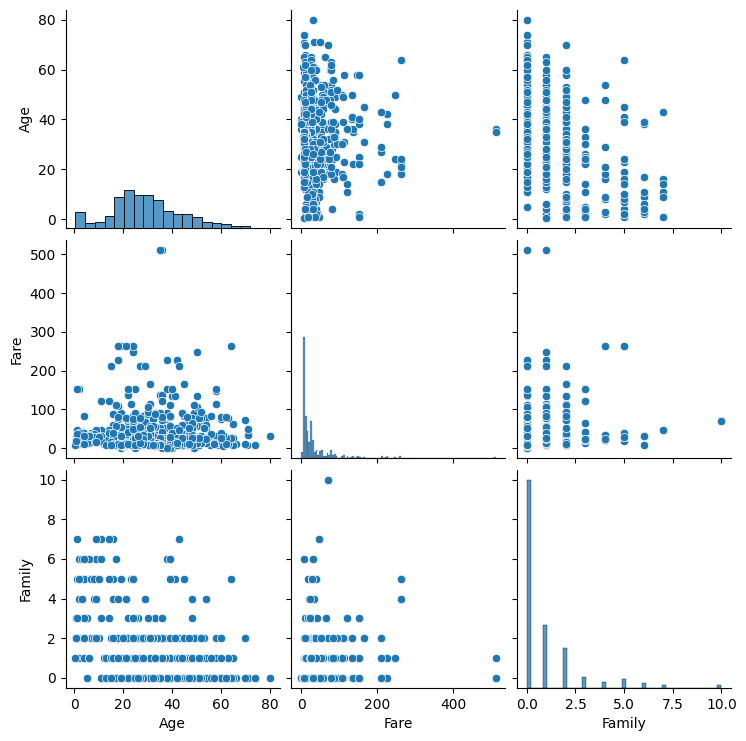

In [40]:
#수치형 중에 이상치가 있는 것들을 삭제할거임
# 숫자형 변수들 이상치 확인하기 위해서 pairplot 
sns.pairplot(train_df_2[['Age','Fare','Family']])
# 보니까 금액 삭제해야겠구만

In [41]:
train_df_2 = train_df_2[train_df_2['Fare']<512]

In [42]:
train_df_2.shape

(888, 13)

In [43]:
### Max 값이 260도 큰데, 그래도 이것 마저 이상치로 판단할 것인가. 는 생각해봐야함.
### 결측치 처리를 해줘야 함. Age >>> 평균으로.
### 범주형 결측치 처리 과반수의 's' 로 대치
train_df_2[['Fare']].describe()

,Fare
count,888.000000
mean,30.582164
std,41.176366
min,0.000000
25%,7.895800
50%,14.454200
75%,30.771850
max,263.000000


In [44]:
def get_non_missing(df):
    Age_mean = train_df_2["Age"].mean()
    df['Age'] = df['Age'].fillna(Age_mean)
    df['Embarked'] = df['Embarked'].fillna('S')
    df['Embarked'] = df['Embarked'].fillna('S')
    fare_mean = train_df_2['Fare'].mean()
    df['Fare'] = df['Fare'].fillna(fare_mean) 
    return df
get_non_missing(train_df_2).info()

## Age, Embarked 대치 완료.

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     888 non-null    object 
 12  Family       888 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.1+ KB


sd_sc = StandardScaler()</br>
scaled_fare = sd_sc.fit_transform(train_df_2['Fare'])

1. fit 과정:
train_df_2['Fare'] 열의 평균과 표준편차를 계산합니다.</br>
예: 만약 Fare의 평균이 32.2, 표준편차가 49.7이라면 이를 저장합니다

</br></br>


In [45]:
def get_numeric_sc(df):
    # sd_sc : Fare , mm_sc : Age, Family
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    sd_sc = StandardScaler()
    mm_sc = MinMaxScaler()
    
    sd_sc.fit(train_df_2[['Fare']]) #여기서 훈련
    df['Fare_sd_sc'] = sd_sc.transform(df[['Fare']]) #훈련한대로 변환

    mm_sc.fit(train_df_2[['Age','Family']])
    df[['Age_mm_sc','Family_mm_sc']] = mm_sc.transform(df[['Age','Family']])
    return df

get_numeric_sc(train_df_2).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Fare_sd_sc,Age_mm_sc,Family_mm_sc
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,8.880000e+02,888.000000,888.000000
mean,445.618243,0.381757,2.313063,29.675345,0.524775,0.381757,30.582164,0.906532,6.801366e-17,0.367622,0.090653
std,257.405474,0.486091,0.834007,13.019816,1.104186,0.806949,41.176366,1.615609,1.000564e+00,0.163607,0.161561
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,-7.431301e-01,0.000000,0.000000
25%,222.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,-5.512664e-01,0.271174,0.000000
50%,445.500000,0.000000,3.000000,29.675345,0.000000,0.000000,14.454200,0.000000,-3.919008e-01,0.367622,0.000000
75%,667.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.771850,1.000000,4.609266e-03,0.434531,0.100000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000,10.000000,5.647628e+00,1.000000,1.000000


In [46]:
#범주형.
def get_category(df):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder

    le = LabelEncoder()
    le2 = LabelEncoder()
    oe = OneHotEncoder()

    #le.fit(train_df_2[['Pclass']])
    #le2.fit(train_df_2[['Sex']])
    le.fit(train_df_2['Pclass'])
    le2.fit(train_df_2['Sex'])
    

    #le.fit(train_df_2[['Pclass','Sex']]) 
    # E : y should be a 1d array, got an array of shape (888, 2) instead.
    df['Pclass_le'] = le.transform(df['Pclass'])
    df['Sex_le'] = le2.transform(df['Sex'])

    #index reset 하기 위한 구문 
    # 0~890 까지 데이터에서 요금이 이상하게 큰 이상치 날렸었는데 그 후 인덱스를 초기화 후
    # 다시 정렬해서 0~887로 이뤄진 index를 만들어야 했는데. 그러지 않아서 에러가 생긴 모습.
    df = df.reset_index()

    oe.fit(train_df_2[['Embarked']])
    #oe transform 할건데 원핫인코딩은 매개체가 필요함. 원핫인코딩은 바꾼다음에 바로 
    #해당하는 값에 넣을 수 없고 데이터프레임을 만들어서 연결해야 함.abs
    embarked_csr = oe.transform(df[['Embarked']])
    embarked_csr_df = pd.DataFrame(embarked_csr.toarray(), columns= oe.get_feature_names_out())
    ## 'S', 'C', 'Q' 중 하나가 1, 나머지 0.

    df = pd.concat([df, embarked_csr_df], axis= 1)
    return df

train_df_2 = get_category(train_df_2)

error : 
- DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

why
- 위 코드는 train_df_2[['Pclass']]를 입력으로 전달하는데, 이것은 2차원 데이터프레임으로 전달됩니다. LabelEncoder는 내부적으로 이를 1차원으로 변환하려고 시도하면서 DataConversionWarning을 발생시킵니다.

solution
- le.fit(train_df_2['Pclass'])  # Series 형태로 전달
- le2.fit(train_df_2['Sex'])    # Series 형태로 전달

혹은 .reval() 사용
- le.fit(train_df_2[['Pclass']].values.ravel())
- le2.fit(train_df_2[['Sex']].values.ravel())

In [47]:
train_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         888 non-null    int64  
 1   PassengerId   888 non-null    int64  
 2   Survived      888 non-null    int64  
 3   Pclass        888 non-null    int64  
 4   Name          888 non-null    object 
 5   Sex           888 non-null    object 
 6   Age           888 non-null    float64
 7   SibSp         888 non-null    int64  
 8   Parch         888 non-null    int64  
 9   Ticket        888 non-null    object 
 10  Fare          888 non-null    float64
 11  Cabin         202 non-null    object 
 12  Embarked      888 non-null    object 
 13  Family        888 non-null    int64  
 14  Fare_sd_sc    888 non-null    float64
 15  Age_mm_sc     888 non-null    float64
 16  Family_mm_sc  888 non-null    float64
 17  Pclass_le     888 non-null    int64  
 18  Sex_le        888 non-null    

In [48]:
def get_model(df):
    from sklearn.linear_model import LogisticRegression
    model_lor = LogisticRegression()
    X = df[['Age_mm_sc','Fare_sd_sc','Family_mm_sc','Pclass_le','Sex_le','Embarked_C','Embarked_Q','Embarked_S']]
    y = df['Survived']
    return  model_lor.fit(X,y)
    

In [49]:
model_output = get_model(train_df_2)
model_output

LogisticRegression()

In [50]:
X = train_df_2[['Age_mm_sc','Fare_sd_sc','Family_mm_sc','Pclass_le','Sex_le','Embarked_C','Embarked_Q','Embarked_S']]
y_pred = model_output.predict(X)

from sklearn.metrics import accuracy_score,f1_score #kaggle에서 accuracy 로 평가한다고 해서 f1 score가 의미가 없긴한데 걍 함
print(accuracy_score(train_df_2['Survived'],y_pred))
print(f1_score(train_df_2['Survived'],y_pred))

0.8029279279279279
0.7320061255742726


### test 데이터로 적용하기

In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [52]:
test_df_2 = get_familiy(test_df)
test_df_2 = get_non_missing(test_df_2)
test_df_2 = get_numeric_sc(test_df_2)
test_df_2 = get_category(test_df_2)
type(model_output)
#get_model

sklearn.linear_model._logistic.LogisticRegression

In [53]:
model_output.classes_
model_output.coef_
model_output.intercept_

array([3.5130964])

In [54]:
train_df_2.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family',
       'Fare_sd_sc', 'Age_mm_sc', 'Family_mm_sc', 'Pclass_le', 'Sex_le',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [55]:
test_df_2.columns

Index(['index', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Fare_sd_sc',
       'Age_mm_sc', 'Family_mm_sc', 'Pclass_le', 'Sex_le', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [56]:
test_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         418 non-null    int64  
 1   PassengerId   418 non-null    int64  
 2   Pclass        418 non-null    int64  
 3   Name          418 non-null    object 
 4   Sex           418 non-null    object 
 5   Age           418 non-null    float64
 6   SibSp         418 non-null    int64  
 7   Parch         418 non-null    int64  
 8   Ticket        418 non-null    object 
 9   Fare          418 non-null    float64
 10  Cabin         91 non-null     object 
 11  Embarked      418 non-null    object 
 12  Family        418 non-null    int64  
 13  Fare_sd_sc    418 non-null    float64
 14  Age_mm_sc     418 non-null    float64
 15  Family_mm_sc  418 non-null    float64
 16  Pclass_le     418 non-null    int64  
 17  Sex_le        418 non-null    int64  
 18  Embarked_C    418 non-null    

In [57]:
y_test_pred = model_output.predict(test_df_2[['Age_mm_sc','Fare_sd_sc','Family_mm_sc','Pclass_le','Sex_le','Embarked_C','Embarked_Q','Embarked_S']])

In [58]:
sub_df = pd.read_csv('/Users/jun/GitStudy/Data_4/Data/titanic/titanic/gender_submission.csv')
sub_df.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [59]:
sub_df['Survived'] =  y_test_pred
sub_df.head(10)
sub_df.to_csv('/Users/jun/GitStudy/Data_4/Data/titanic/titanic/result.csv',index=False)

In [64]:
train_df_2 = train_df_2.drop(columns='index')

In [65]:
train_df_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Family,Fare_sd_sc,Age_mm_sc,Family_mm_sc,Pclass_le,Sex_le,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,...,S,1,-0.566959,0.271174,0.1,2,1,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,...,C,1,0.989016,0.472229,0.1,0,0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,0,-0.550557,0.321438,0.0,2,0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,...,S,1,0.547171,0.434531,0.1,0,0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,...,S,0,-0.547519,0.434531,0.0,2,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,...,S,0,-0.427237,0.334004,0.0,1,1,0.0,0.0,1.0
884,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,...,S,0,-0.014146,0.233476,0.0,0,0,0.0,0.0,1.0
885,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.675345,1,2,W./C. 6607,23.4500,...,S,3,-0.173308,0.367622,0.3,2,0,0.0,0.0,1.0
886,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,...,C,0,-0.014146,0.321438,0.0,0,1,1.0,0.0,0.0


k fold 수행하기

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
train_df_2.columns

In [ ]:
kfold = KFold(n_splits=5)
scores = []
X = train_df_2[['Age_mm_sc','Fare_sd_sc','Family_mm_sc','Pclass_le','Sex_le','Embarked_C','Embarked_Q','Embarked_S']]
y = train_df_2['Survived']

for i , (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score
    model_lor2 = LogisticRegression()
    model_lor2.fit(X_train, y_train)
    y_pred2 = model_lor2.predict(X_test)
    #accuracy = accuracy_score(y_test, y_pred2).round(3)
    accuracy = round(accuracy_score(y_test, y_pred2),3)
    print(i, '번째 교차검증 정확도는', accuracy)
    scores.append(accuracy)

print('평균 정확도 :', np.mean(scores))

## GridSearch 적용하기
공식문서 하이퍼 파라미터 보면 대표적으로 바꿔볼 수 있는 게 있다.
알고리즘을 풀려는 solver, 알고리즘 자체를 선택할 수 있다. optimizing 하는데.
다양한 전달 인자를 넣어서 모델을 최적화를 해보고 싶어.문헌을 참고하거나 잘 알려져 있는 것들을 바꿔 보는 것이다. 다 일일이 바꿔서 만들면
귀찮게. 처음 설계도를 가져올 때 solver 라는 값을 바꿔서 넣어서 할당해야 하거든요.
귀찮으니까 grid Search 라는 것을 활용해서 내가 사전에 파라미터를 설정해 주면 그 가짓수에 대해서 다 설정해줘요. 자동으로 만들어주는 도구라고 할 수 있겠다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
        'max_iter' : [100,300,500]
        } # 사전 지정한 파라미터 5 * 2 10개의 모델을 만들어서 자동으로 만들어줘
# 모델 넣어주고, 파라미터 딕셔너리 모든 내용 검색해줘. 평가지표 정확도야, cross v = 5개야.
grid_lor = GridSearchCV(model_lor2, param_grid= params, scoring='accuracy', cv = 7)
grid_lor.fit(X_train, y_train)

print('최고의 하이퍼 파라미터', grid_lor.best_params_)
print('최고의 정확도',grid_lor.best_score_.round(3))